PyTorch version: 2.8.0+cu126
CUDA available: True
Using device: cuda


100%|██████████| 170M/170M [00:06<00:00, 26.8MB/s]


Training samples: 50000
Test samples: 10000
Number of classes: 10


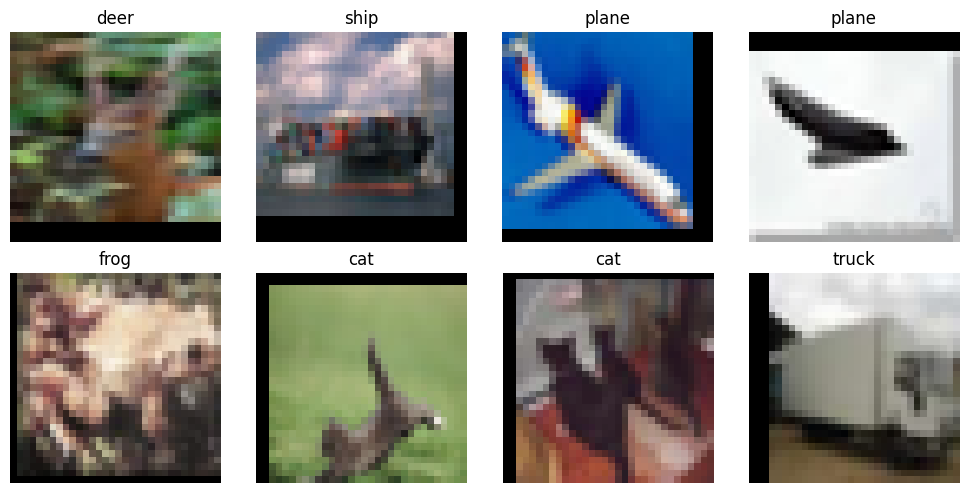

Model parameters: 11,173,962
Input shape: torch.Size([4, 3, 32, 32])
Output shape: torch.Size([4, 10])
Output range: [-0.029, 0.089]
✓ Model architecture test passed!
Starting ResNet-18 training on CIFAR-10...
Training on cuda

Epoch 1/10
--------------------------------------------------


Validating: 100%|██████████| 100/100 [00:03<00:00, 27.72it/s]


Train Loss: 1.863 | Train Acc: 32.53%
Val Loss: 1.558 | Val Acc: 42.45%
Learning Rate: 0.100000

Epoch 2/10
--------------------------------------------------


Validating: 100%|██████████| 100/100 [00:02<00:00, 34.60it/s]


Train Loss: 1.408 | Train Acc: 48.23%
Val Loss: 1.246 | Val Acc: 54.50%
Learning Rate: 0.100000

Epoch 3/10
--------------------------------------------------


Validating: 100%|██████████| 100/100 [00:02<00:00, 34.79it/s]


Train Loss: 1.154 | Train Acc: 58.69%
Val Loss: 1.279 | Val Acc: 57.22%
Learning Rate: 0.100000

Epoch 4/10
--------------------------------------------------


Validating: 100%|██████████| 100/100 [00:02<00:00, 34.36it/s]


Train Loss: 0.966 | Train Acc: 65.84%
Val Loss: 0.899 | Val Acc: 68.56%
Learning Rate: 0.100000

Epoch 5/10
--------------------------------------------------


Validating: 100%|██████████| 100/100 [00:02<00:00, 34.97it/s]


Train Loss: 0.848 | Train Acc: 70.16%
Val Loss: 0.808 | Val Acc: 71.34%
Learning Rate: 0.100000

Epoch 6/10
--------------------------------------------------


Validating: 100%|██████████| 100/100 [00:02<00:00, 34.78it/s]


Train Loss: 0.748 | Train Acc: 73.74%
Val Loss: 0.721 | Val Acc: 75.02%
Learning Rate: 0.100000

Epoch 7/10
--------------------------------------------------


Validating: 100%|██████████| 100/100 [00:02<00:00, 33.74it/s]


Train Loss: 0.651 | Train Acc: 77.24%
Val Loss: 0.631 | Val Acc: 78.55%
Learning Rate: 0.010000

Epoch 8/10
--------------------------------------------------


Validating: 100%|██████████| 100/100 [00:02<00:00, 34.44it/s]


Train Loss: 0.481 | Train Acc: 83.28%
Val Loss: 0.483 | Val Acc: 83.67%
Learning Rate: 0.010000

Epoch 9/10
--------------------------------------------------


Validating: 100%|██████████| 100/100 [00:03<00:00, 28.65it/s]


Train Loss: 0.439 | Train Acc: 84.81%
Val Loss: 0.465 | Val Acc: 84.34%
Learning Rate: 0.010000

Epoch 10/10
--------------------------------------------------


Validating: 100%|██████████| 100/100 [00:02<00:00, 33.41it/s]


Train Loss: 0.413 | Train Acc: 85.65%
Val Loss: 0.457 | Val Acc: 84.40%
Learning Rate: 0.010000

Training completed! Best validation accuracy: 84.40%


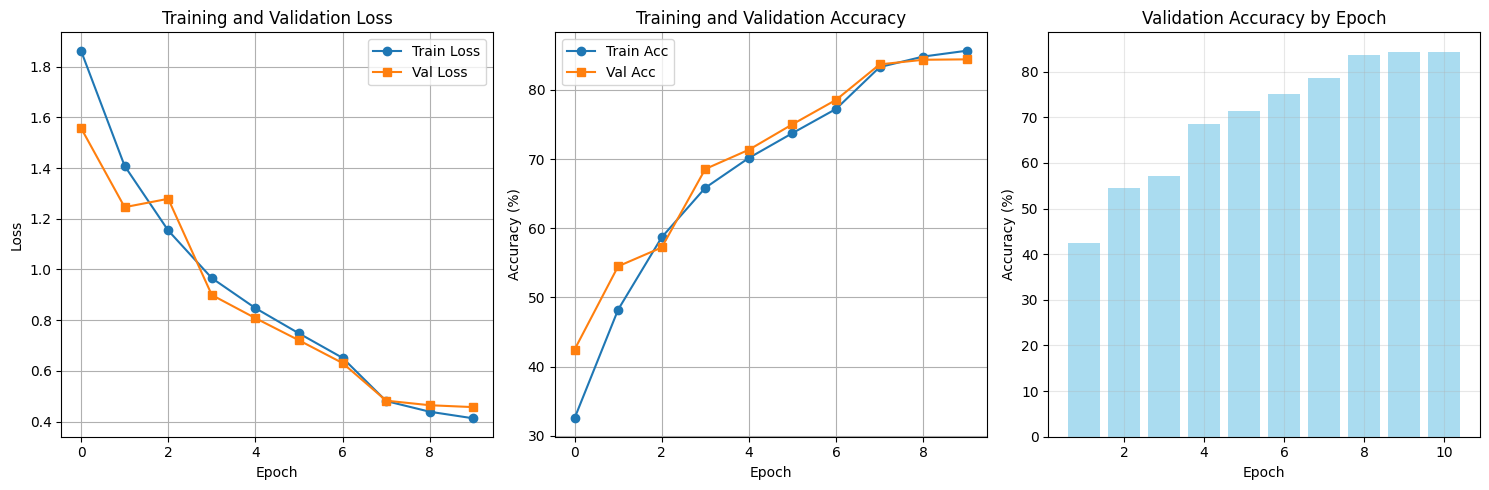

Per-class accuracy:
plane: 85.70%
car: 92.70%
bird: 76.10%
cat: 63.20%
deer: 82.10%
dog: 82.30%
frog: 88.30%
horse: 88.20%
ship: 93.40%
truck: 92.00%

Overall Test Accuracy: 84.40%


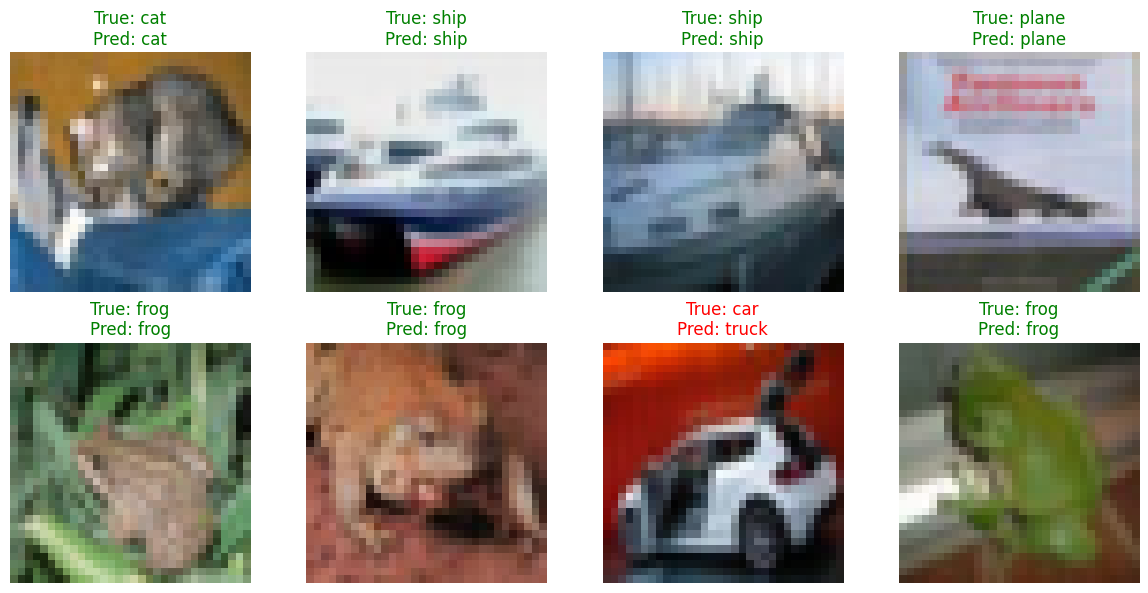

Model saved successfully!


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Data transformations
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)
test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_test)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=128, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=100, shuffle=False, num_workers=2)

# CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Number of classes: {len(classes)}")

# Function to show images
def show_sample_images():
    dataiter = iter(train_loader)
    images, labels = next(dataiter)

    fig, axes = plt.subplots(2, 4, figsize=(10, 5))
    for i in range(8):
        img = images[i]
        # Denormalize for display
        img = img * torch.tensor([0.2023, 0.1994, 0.2010]).view(3, 1, 1)
        img = img + torch.tensor([0.4914, 0.4822, 0.4465]).view(3, 1, 1)
        img = torch.clamp(img, 0, 1)

        ax = axes[i//4, i%4]
        ax.imshow(img.permute(1, 2, 0))
        ax.set_title(f'{classes[labels[i]]}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

show_sample_images()

class BasicBlock(nn.Module):
    """Basic ResNet block for ResNet-18 and ResNet-34"""
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()

        # First convolutional layer
        self.conv1 = nn.Conv2d(in_channels, out_channels,
                              kernel_size=3, stride=stride,
                              padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)

        # Second convolutional layer
        self.conv2 = nn.Conv2d(out_channels, out_channels,
                              kernel_size=3, stride=1,
                              padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Shortcut connection
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != self.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, self.expansion * out_channels,
                         kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 64

        # Initial convolution layer
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3,
                              stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)

        # ResNet layers
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)

        # Final classification layer
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avgpool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

# Create ResNet-18
def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])

# Initialize model
model = ResNet18().to(device)
print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")


# Test forward pass with sample data
def test_model():
    model.eval()
    with torch.no_grad():
        # Test with single batch
        sample_input = torch.randn(4, 3, 32, 32).to(device)
        output = model(sample_input)
        print(f"Input shape: {sample_input.shape}")
        print(f"Output shape: {output.shape}")
        print(f"Output range: [{output.min():.3f}, {output.max():.3f}]")

        # Test with different batch sizes
        for batch_size in [1, 16, 64]:
            test_input = torch.randn(batch_size, 3, 32, 32).to(device)
            test_output = model(test_input)
            assert test_output.shape == (batch_size, 10), f"Wrong output shape for batch_size {batch_size}"

        print("✓ Model architecture test passed!")

test_model()


# Training hyperparameters
learning_rate = 0.1
num_epochs = 10
weight_decay = 1e-4

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,
                           momentum=0.9, weight_decay=weight_decay)

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Training function
def train_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    progress_bar = tqdm(train_loader, desc='Training')
    for batch_idx, (inputs, targets) in enumerate(progress_bar):
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

        # Update progress bar
        progress_bar.set_postfix({
            'Loss': f'{running_loss/(batch_idx+1):.3f}',
            'Acc': f'{100.*correct/total:.2f}%'
        })

    return running_loss/len(train_loader), 100.*correct/total

# Validation function
def validate(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, targets in tqdm(test_loader, desc='Validating'):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    return running_loss/len(test_loader), 100.*correct/total


# Training loop
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

print("Starting ResNet-18 training on CIFAR-10...")
print(f"Training on {device}")

for epoch in range(num_epochs):
    print(f'\nEpoch {epoch+1}/{num_epochs}')
    print('-' * 50)

    # Train for one epoch
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)

    # Validate
    val_loss, val_acc = validate(model, test_loader, criterion, device)

    # Update learning rate
    scheduler.step()

    # Record metrics
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f'Train Loss: {train_loss:.3f} | Train Acc: {train_acc:.2f}%')
    print(f'Val Loss: {val_loss:.3f} | Val Acc: {val_acc:.2f}%')
    print(f'Learning Rate: {optimizer.param_groups[0]["lr"]:.6f}')

print(f'\nTraining completed! Best validation accuracy: {max(val_accuracies):.2f}%')



# Plot training curves
plt.figure(figsize=(15, 5))

# Loss curves
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Train Loss', marker='o')
plt.plot(val_losses, label='Val Loss', marker='s')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy curves
plt.subplot(1, 3, 2)
plt.plot(train_accuracies, label='Train Acc', marker='o')
plt.plot(val_accuracies, label='Val Acc', marker='s')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Final comparison
plt.subplot(1, 3, 3)
epochs = range(1, len(train_accuracies) + 1)
plt.bar(epochs, val_accuracies, alpha=0.7, color='skyblue')
plt.title('Validation Accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Detailed evaluation
def evaluate_model(model, test_loader, classes, device):
    model.eval()
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            c = (predicted == targets).squeeze()

            for i in range(targets.size(0)):
                label = targets[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    # Print per-class accuracy
    print("Per-class accuracy:")
    for i in range(10):
        accuracy = 100 * class_correct[i] / class_total[i]
        print(f'{classes[i]}: {accuracy:.2f}%')

    overall_accuracy = 100 * sum(class_correct) / sum(class_total)
    print(f'\nOverall Test Accuracy: {overall_accuracy:.2f}%')

    return overall_accuracy

final_accuracy = evaluate_model(model, test_loader, classes, device)


# Visualize predictions
def visualize_predictions(model, test_loader, classes, device, num_images=8):
    model.eval()
    images_shown = 0

    fig, axes = plt.subplots(2, 4, figsize=(12, 6))

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)

            for i in range(inputs.size(0)):
                if images_shown >= num_images:
                    break

                # Denormalize image for display
                img = inputs[i].cpu()
                img = img * torch.tensor([0.2023, 0.1994, 0.2010]).view(3, 1, 1)
                img = img + torch.tensor([0.4914, 0.4822, 0.4465]).view(3, 1, 1)
                img = torch.clamp(img, 0, 1)

                ax = axes[images_shown//4, images_shown%4]
                ax.imshow(img.permute(1, 2, 0))

                true_label = classes[targets[i]]
                pred_label = classes[predicted[i]]
                color = 'green' if targets[i] == predicted[i] else 'red'

                ax.set_title(f'True: {true_label}\nPred: {pred_label}', color=color)
                ax.axis('off')

                images_shown += 1

            if images_shown >= num_images:
                break

    plt.tight_layout()
    plt.show()

visualize_predictions(model, test_loader, classes, device)


# Save the trained model
torch.save({
    'epoch': num_epochs,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_losses': train_losses,
    'val_losses': val_losses,
    'train_accuracies': train_accuracies,
    'val_accuracies': val_accuracies,
}, 'resnet18_cifar10.pth')

print("Model saved successfully!")